
N=64: Matrix mult = 0.0002s, FFT = 0.0017s

N=128: Matrix mult = 0.0007s, FFT = 0.0000s

N=256: Matrix mult = 0.0015s, FFT = 0.0000s


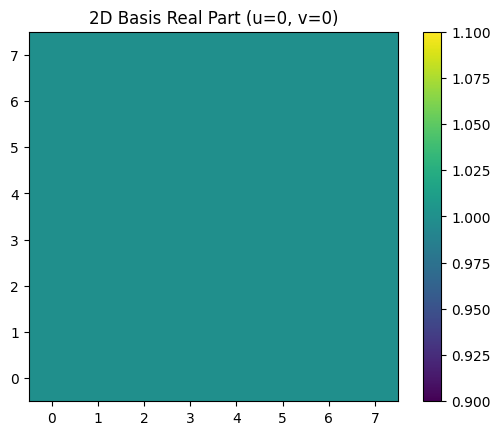

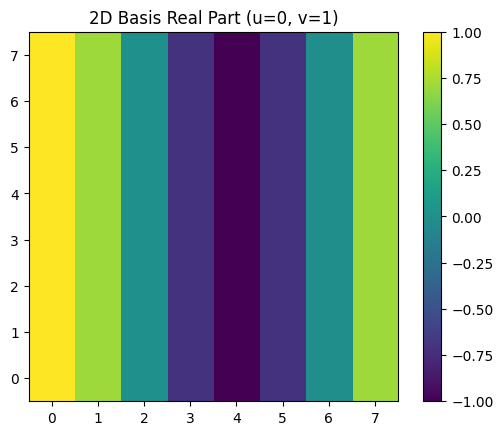

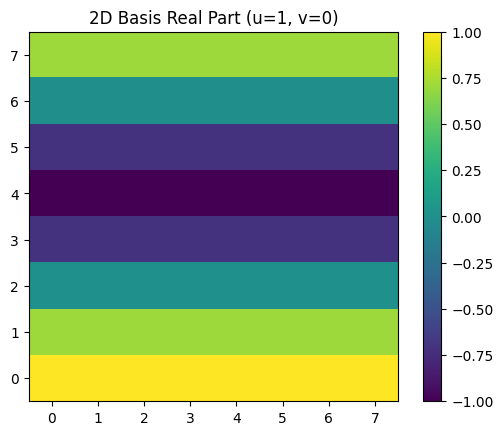

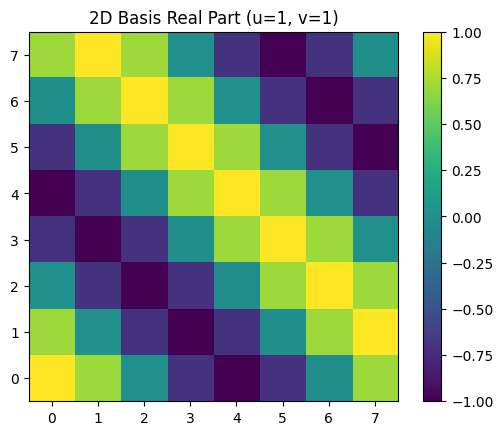

In [1]:
from A5_rhl72 import *

# 1a

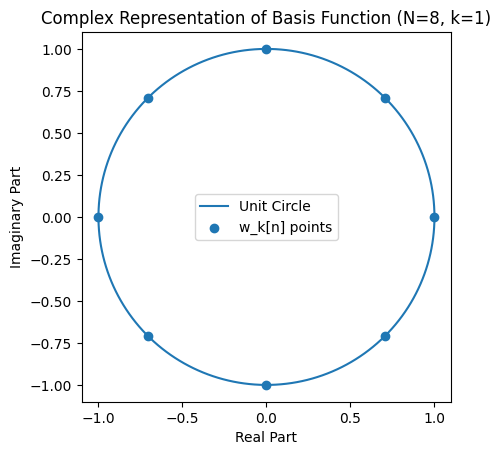

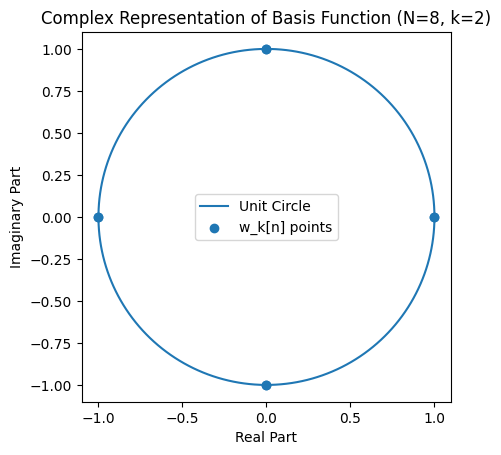

In [2]:
# Demonstrate for N=8, k=1 and k=2
plot_complex_basis(8, 1)
plot_complex_basis(8, 2)

# 1b

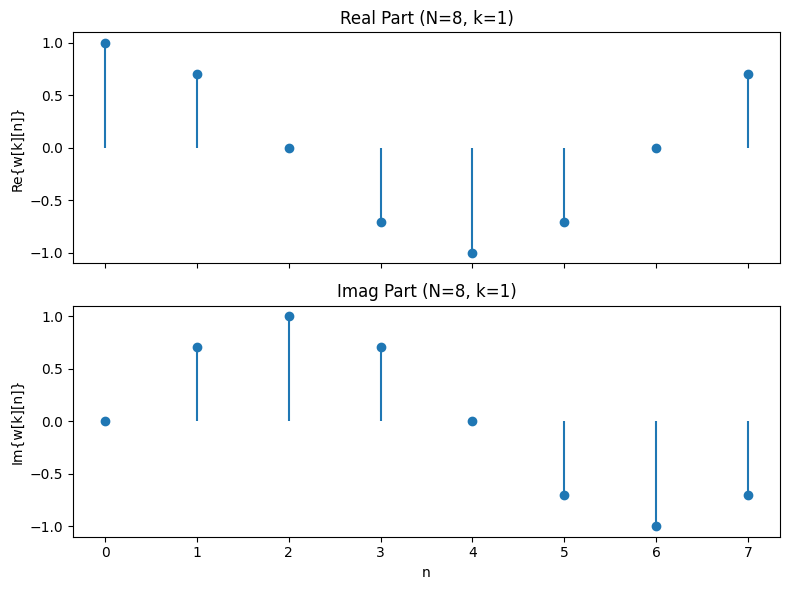

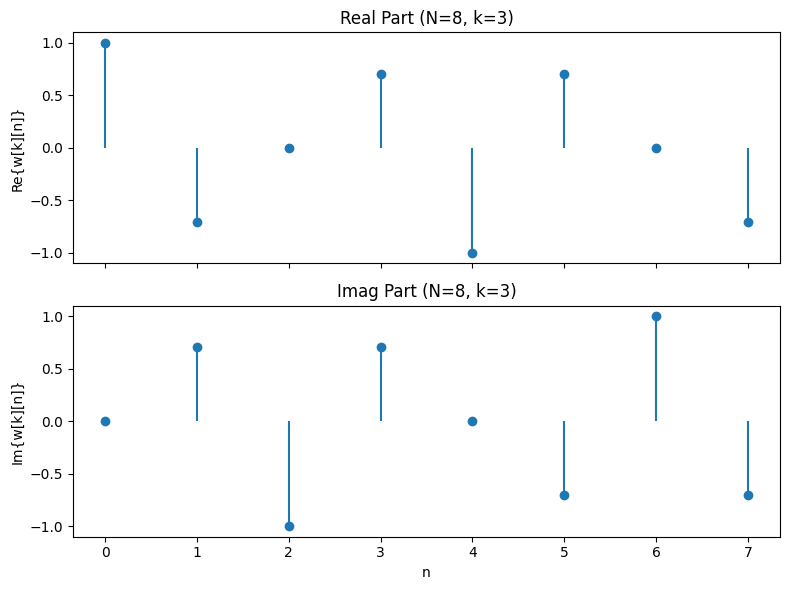

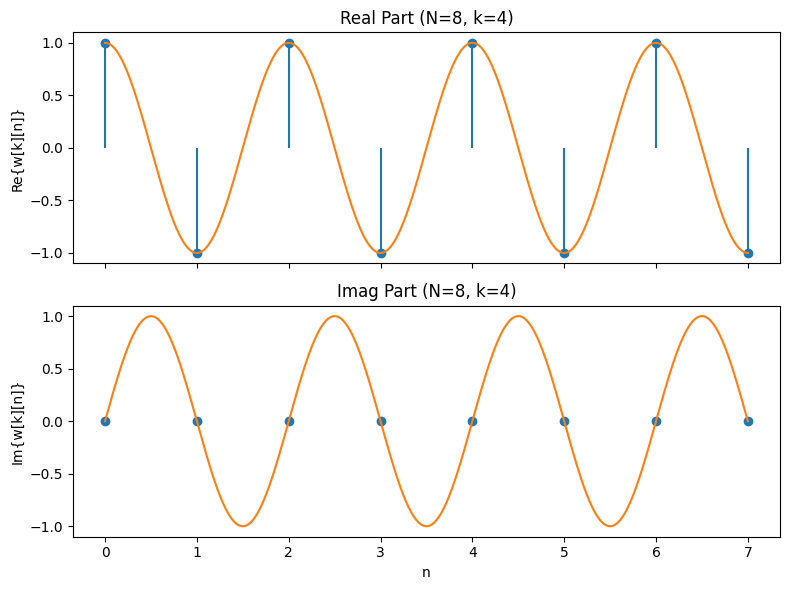

In [3]:
# Illustrate for N=8 with k = 1, 3, and Nyquist k = 4
for k in [1, 3, 4]:
    plotw(k, 8)
    

# 1c

In [4]:
N = 8
orth = np.zeros((N, N), dtype=complex)
for m in range(N):
    for k in range(N):
        orth[m, k] = np.vdot(basis_vector(m, N), basis_vector(k, N))

print("Inner product matrix ⟨w_m, w_k⟩ (should be N on diagonal, ~0 off-diagonal):")
print(np.round(orth, 5))

Inner product matrix ⟨w_m, w_k⟩ (should be N on diagonal, ~0 off-diagonal):
[[ 8.+0.j -0.+0.j -0.+0.j -0.-0.j  0.+0.j -0.+0.j -0.+0.j  0.-0.j]
 [-0.-0.j  8.+0.j -0.+0.j  0.+0.j -0.+0.j -0.-0.j  0.-0.j  0.-0.j]
 [-0.-0.j -0.-0.j  8.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.-0.j -0.-0.j  8.+0.j -0.-0.j -0.+0.j -0.-0.j  0.+0.j]
 [ 0.-0.j -0.-0.j -0.-0.j -0.+0.j  8.+0.j -0.-0.j  0.+0.j -0.+0.j]
 [-0.-0.j -0.+0.j  0.-0.j -0.-0.j -0.+0.j  8.+0.j  0.+0.j  0.-0.j]
 [-0.-0.j  0.+0.j  0.-0.j -0.+0.j  0.-0.j  0.-0.j  8.+0.j -0.-0.j]
 [ 0.+0.j  0.+0.j  0.-0.j  0.-0.j -0.-0.j  0.+0.j -0.+0.j  8.+0.j]]


# 2a

In [5]:
A = fourier_matrix(5)
print("\nFourier matrix A (N=5):")
print(np.round(A, 3))


Fourier matrix A (N=5):
[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.309+0.951j -0.809+0.588j -0.809-0.588j  0.309-0.951j]
 [ 1.   +0.j    -0.809+0.588j  0.309-0.951j  0.309+0.951j -0.809-0.588j]
 [ 1.   +0.j    -0.809-0.588j  0.309+0.951j  0.309-0.951j -0.809+0.588j]
 [ 1.   +0.j     0.309-0.951j -0.809-0.588j -0.809+0.588j  0.309+0.951j]]


# 2b

In [6]:
prod = A.conj().T.dot(A)
print("\nA^H A (should equal N*I):")
print(np.round(prod, 3))


A^H A (should equal N*I):
[[ 5.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j  5.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j -0.-0.j  5.+0.j -0.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j -0.-0.j  5.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j -0.-0.j -0.+0.j  5.+0.j]]


# 2c

In [7]:
x = np.random.randn(8)
X_mat = fourier_matrix(8).conj().T.dot(x)
X_fft = np.fft.fft(x)
print("\nMax |X_mat - X_fft| difference:")
print(np.max(np.abs(X_mat - X_fft)))


Max |X_mat - X_fft| difference:
7.755684626330685e-15


# 2d

In [8]:
for N in [64, 128, 256]:
    x = np.random.randn(N)
    start = time.time()
    fourier_matrix(N).dot(x)
    t_mat = time.time() - start
    start = time.time()
    np.fft.fft(x)
    t_fft = time.time() - start
    print(f"\nN={N}: Matrix mult = {t_mat:.4f}s, FFT = {t_fft:.4f}s")


N=64: Matrix mult = 0.0004s, FFT = 0.0035s

N=128: Matrix mult = 0.0147s, FFT = 0.0001s

N=256: Matrix mult = 0.0016s, FFT = 0.0000s


# 2e

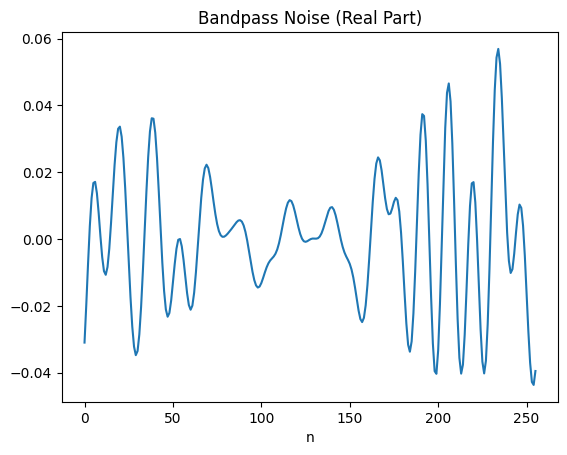

In [9]:
N = 256
spec = np.zeros(N, dtype=complex)
low, high = 5, 20
spec[low:high] = np.random.randn(high-low) + 1j * np.random.randn(high-low)
spec[-high:-low] = np.conj(spec[low:high][::-1])
y = np.fft.ifft(spec)

plt.figure()
plt.plot(y.real)
plt.title("Bandpass Noise (Real Part)")
plt.xlabel("n")
plt.show()

# 3

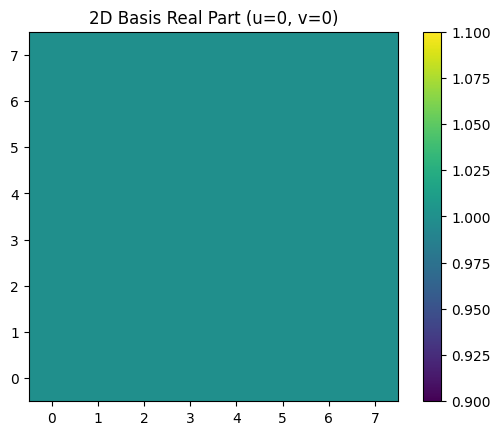

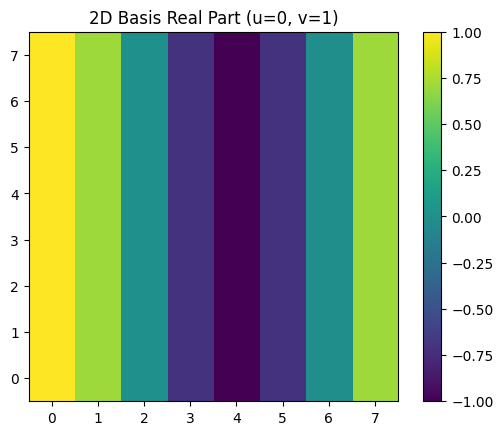

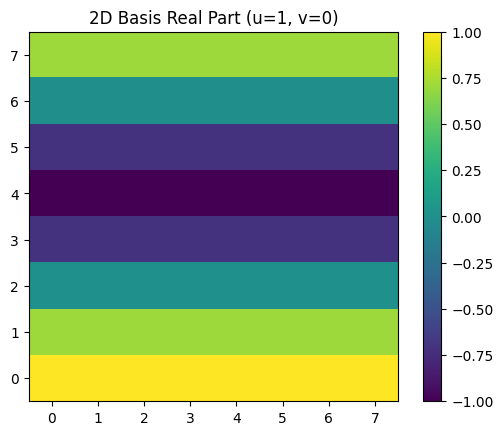

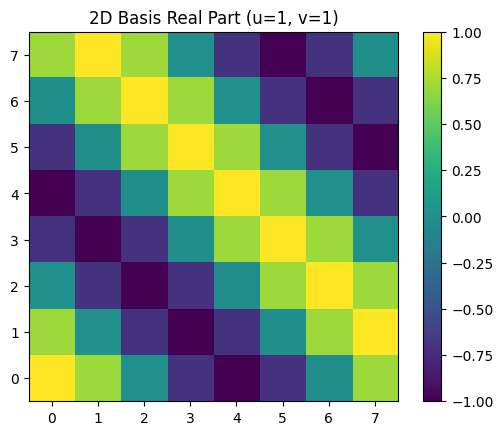

In [11]:
Ns = 8
for u in range(2):
    for v in range(2):
        basis2d = np.zeros((Ns, Ns), dtype=complex)
        for x in range(Ns):
            for y in range(Ns):
                basis2d[x, y] = np.exp(2j * np.pi * (u*x + v*y) / Ns)
        plt.figure()
        plt.imshow(basis2d.real, origin='lower')
        plt.title(f"2D Basis Real Part (u={u}, v={v})")
        plt.colorbar()
        plt.show()